<a href="https://colab.research.google.com/github/pachterlab/monod/blob/anndata/Monod_demo_new.ipynb?short_path=e568791" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Monod* on Colab

In the current notebook, we apply *Monod* to identify differentially regulated genes between GABAergic and glutamatergic cell types in a single Allen dataset. 

# Inference pipeline

## Import packages

In [1]:
# import monod
# from monod import preprocess, extract_data, cme_toolbox, inference, analysis

import matplotlib.pyplot as plt
import numpy as np
import anndata as ad

In [2]:
import logging, sys
logging.basicConfig(stream=sys.stdout)
log = logging.getLogger()
log.setLevel(logging.INFO)
import warnings
warnings.filterwarnings("ignore") #warning suppression within script is not respected by colab
warnings.simplefilter('ignore')

In [3]:
import sys

sys.path.insert(0, '../monod/src/monod')

import extract_data, cme_toolbox, inference, analysis
import importlib

importlib.reload(extract_data)
importlib.reload(inference)
importlib.reload(cme_toolbox)
importlib.reload(analysis)

<module 'analysis' from '/home/mffang/workspace/Monod/monod_test/../monod/src/monod/analysis.py'>

## Set up model and perform inference.

In [4]:
import pandas as pd
demo_genes = np.array(list(pd.read_csv('fits/gg_240821_029_desai_1/genes.csv',sep=',',header=None).iloc[0]),dtype=str)
demo_genes

array(['AC149090.1', 'Rrp15', 'Ddx18', ..., 'Chic1', 'Eif2s3y', 'Gm47283'],
      dtype='<U13')

In [5]:
adata = ad.read_loom('/home/ggorin/count_data/loom_desai_kb/desai_dmso.loom')
adata.var_names = adata.var['gene_name']

In [ ]:
# Define model.
fitmodel = cme_toolbox.CMEModel('Bursty','Poisson')
transcriptome_filepath = '../monod_examples/polyA_ref/gg_200524_mouse_genome_polyA_cum_1'

# Perform inference. (don't need to give these bounds, here for debugging but can use defaults.)
lb = [-1.0, -1.8, -1.8 ]
ub = [4.2, 2.5, 3.5]
samp_lb = [-7.5, -2]
samp_ub = [-5.5, 0]
grid = [20,21]

dmso_adata = inference.perform_inference(adata, fitmodel,\
                                         n_genes=2000, seed=0, genes_to_fit=demo_genes,
                                        phys_lb=lb, phys_ub=ub, gridsize=grid, samp_lb=samp_lb, samp_ub=samp_ub, 
                                        gradient_params = {'max_iterations':5,'init_pattern':'moments','num_restarts':1}, 
                                         transcriptome_filepath=transcriptome_filepath,num_cores=40) 

The expected modalities for this model are: ['unspliced', 'spliced']
If your anndata layers have different names, please give a modality dictionary of the form: modality_name_dict  = {'spliced':your_spliced_layer_name, 'unspliced':your_unspliced_layer_name} 
INFO:root:No dataset name given (dataset_string=None). Saving as Bursty_Poisson
INFO:root:Directory Bursty_Poisson already exists.
INFO:root:Beginning data extraction.
INFO:root:Dataset: Bursty_Poisson
is sparse
INFO:root:Added lengths
INFO:root:904 cells detected.
2494 genes retained after expression filter.
INFO:root:0 random genes selected.
INFO:root:Total of 2000 genes selected.
['unspliced', 'spliced'] previous ordering
['unspliced', 'spliced'] ordered for histogram
INFO:root:Data extracted
LayersView with keys: unspliced, spliced
['unspliced', 'spliced']
INFO:root:Search data created.
INFO:root:Directory Bursty_Poisson/Bursty_Poisson_20x21 already exists.
INFO:root:Global inference parameters stored to Bursty_Poisson/Bursty_P

100%|██████████| 420/420 [23:58<00:00,  3.43s/it]  

INFO:root:Parallelized grid scan complete.
INFO:root:All grid point data cleaned from disk.


INFO:root:Directory Bursty_Poisson/Bursty_Poisson_20x21/analysis_figures already exists.
INFO:root:Grid scan results stored to Bursty_Poisson/Bursty_Poisson_20x21/grid_scan_results.res.
INFO:root:Runtime: 1440.1 seconds.
INFO:root:Grid points fit.
INFO:root:Optimal parameters found.
INFO:root:Optimal parameters saved.
Layers with keys: unspliced, spliced
['unspliced', 'spliced']
INFO:root:AIC values calculated.
INFO:root:Computing local Hessian.
INFO:root:Starting non-parallelized Hessian computation.
INFO:root:Non-parallelized Hessian computation complete.
INFO:root:Gene 0 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 3 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 5 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 6 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 7 gives negative stdev; replaced with

/home/mffang/workspace/Monod/monod_test/../monod/src/monod/inference.py:1911: RuntimeWarning: invalid value encountered in sqrt
  sigma[gene_index, :] = np.sqrt(np.diag(hess_inv)) / np.sqrt(


INFO:root:Gene 965 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 969 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 976 ran into singularity; replaced with mean. (Search converged to local minimum?) 
INFO:root:Gene 978 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 981 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 983 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 986 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 987 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 988 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 991 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 993 

In [16]:
adata = ad.read_loom('/home/ggorin/count_data/loom_desai_kb/desai_idu.loom')
adata.var_names = adata.var['gene_name']

/home/mffang/miniconda3/envs/python_3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/mffang/miniconda3/envs/python_3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


INFO:root:No dataset name given (dataset_string=None). Saving as Bursty_Poisson
INFO:root:Directory Bursty_Poisson already exists.
INFO:root:Beginning data extraction.
INFO:root:Dataset: Bursty_Poisson


/home/mffang/miniconda3/envs/python_3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


is sparse
INFO:root:Added lengths


/home/mffang/miniconda3/envs/python_3.8/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


INFO:root:805 cells detected.


/home/mffang/miniconda3/envs/python_3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


2873 genes retained after expression filter.
INFO:root:0 random genes selected.
INFO:root:Total of 2000 genes selected.
['unspliced', 'spliced'] previous ordering
['unspliced', 'spliced'] ordered for histogram
INFO:root:Data extracted
LayersView with keys: unspliced, spliced
['unspliced', 'spliced']
INFO:root:Search data created.
INFO:root:Directory Bursty_Poisson/Bursty_Poisson_20x21 already exists.
INFO:root:Global inference parameters stored to Bursty_Poisson/Bursty_Poisson_20x21/parameters.pr.
INFO:root:Global inference parameters set.
INFO:root:Starting non-parallelized grid scan.
INFO:root:Non-parallelized grid scan complete.
INFO:root:All grid point data cleaned from disk.
INFO:root:Directory Bursty_Poisson/Bursty_Poisson_20x21/analysis_figures already exists.
INFO:root:Grid scan results stored to Bursty_Poisson/Bursty_Poisson_20x21/grid_scan_results.res.
INFO:root:Runtime: 34141.0 seconds.
INFO:root:Grid points fit.
INFO:root:Optimal parameters found.
INFO:root:Optimal paramete

/home/mffang/workspace/Monod/monod_test/../monod/src/monod/inference.py:166: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  monod_adata.var['param_' + param_name] = param_values


INFO:root:AIC values calculated.
INFO:root:Computing local Hessian.
INFO:root:Starting non-parallelized Hessian computation.
INFO:root:Non-parallelized Hessian computation complete.
INFO:root:Gene 0 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 2 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 3 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 4 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 6 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 7 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 8 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 9 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 10 gives negative stdev; replaced w

/home/mffang/workspace/Monod/monod_test/../monod/src/monod/inference.py:1911: RuntimeWarning: invalid value encountered in sqrt
  sigma[gene_index, :] = np.sqrt(np.diag(hess_inv)) / np.sqrt(


INFO:root:Gene 978 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 979 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 982 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 983 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 984 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 986 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 987 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 989 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 991 gives negative stdev; replaced with mean. (Search converged to local minimum?)
INFO:root:Gene 993 ran into singularity; replaced with mean. (Search converged to local minimum?) 
INFO:root:Gene 996 

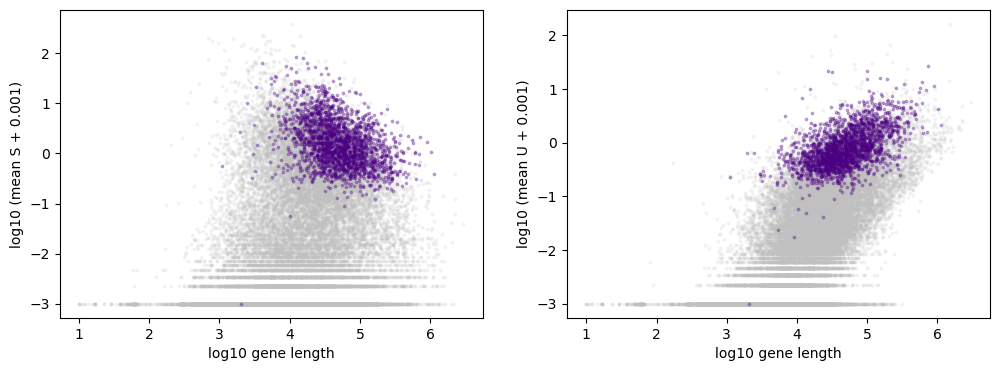

In [17]:
idu_adata = inference.perform_inference(adata, fitmodel,\
                                         n_genes=2000, seed=0, genes_to_fit=demo_genes,
                                        phys_lb=lb, phys_ub=ub, gridsize=grid, samp_lb=samp_lb, samp_ub=samp_ub, 
                                        gradient_params = {'max_iterations':5,'init_pattern':'moments','num_restarts':1}, 
                                         transcriptome_filepath=transcriptome_filepath) 

## Access gene info.

In [21]:
dmso_adata.uns["search_result"].samp_optimum, idu_adata.uns["search_result"].samp_optimum

((-5.710526315789474, 0.0), (-5.5, 0.0))

In [18]:
dmso_adata.var

,gene_id,gene_name,length_given,lengths,log_lengths,gene_exp_filter,length,selected_genes,MOM_unspliced_mean,MOM_unspliced_var,MOM_spliced_mean,MOM_spliced_var,MOM_cov_unspliced_spliced,param_$\log_{10} b$,param_$\log_{10} \beta$,param_$\log_{10} \gamma$,AIC,sigma_$\log_{10} b$,sigma_$\log_{10} \beta$,sigma_$\log_{10} \gamma$
gene_name,,,,,,,,,,,,,,,,,,,,
AC149090.1,ENSMUSG00000095041.7,AC149090.1,1,7501.0,3.875119,False,7501,True,NaN,NaN,NaN,NaN,0.045554,3.187004,0.842190,2.627424,4003.303782,124.453556,22.323129,205.575640
Rrp15,ENSMUSG00000001305.5,Rrp15,1,28381.0,4.453028,True,28381,True,NaN,NaN,NaN,NaN,1.258298,0.913543,0.029420,-1.673198,8585.463386,0.080526,0.076693,1.317636
Ddx18,ENSMUSG00000001674.11,Ddx18,1,14155.0,4.150910,False,14155,True,NaN,NaN,NaN,NaN,0.734227,1.531783,0.158339,0.776885,6751.907139,0.041753,0.030508,0.036411
Arpc2,ENSMUSG00000006304.14,Arpc2,1,32126.0,4.506857,True,32126,True,NaN,NaN,NaN,NaN,2.334367,4.024135,2.500000,2.739807,15134.992925,124.453556,22.323129,205.575640
Hdac4,ENSMUSG00000026313.16,Hdac4,1,266921.0,5.426383,True,266921,True,NaN,NaN,NaN,NaN,0.191094,0.025204,0.093588,0.240788,4736.419932,0.044295,0.048269,0.054997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Taf1,ENSMUSG00000031314.18,Taf1,1,69056.0,4.839201,True,69056,True,NaN,NaN,NaN,NaN,0.633015,2.224999,0.675313,1.143594,7465.666685,124.453556,22.323129,205.575640
Renbp,ENSMUSG00000031387.14,Renbp,1,8730.0,3.941014,False,8730,True,NaN,NaN,NaN,NaN,0.289643,1.703629,0.515426,1.124367,6731.005524,0.044776,0.032952,0.042587
Chic1,ENSMUSG00000031327.10,Chic1,1,39617.0,4.597882,False,39617,True,NaN,NaN,NaN,NaN,0.099319,1.374173,0.238990,1.872207,4687.248282,0.039603,0.036185,0.050096


In [19]:
# Optimum biological parameters.
display(dmso_adata.var[[i for i in dmso_adata.var.keys() if 'param' in i]])

,param_$\log_{10} b$,param_$\log_{10} \beta$,param_$\log_{10} \gamma$
gene_name,,,
AC149090.1,3.187004,0.842190,2.627424
Rrp15,0.913543,0.029420,-1.673198
Ddx18,1.531783,0.158339,0.776885
Arpc2,4.024135,2.500000,2.739807
Hdac4,0.025204,0.093588,0.240788
...,...,...,...
Taf1,2.224999,0.675313,1.143594
Renbp,1.703629,0.515426,1.124367
Chic1,1.374173,0.238990,1.872207


In [20]:
# Optimum biological parameters.
display(idu_adata.var[[i for i in idu_adata.var.keys() if 'param' in i]])

,param_$\log_{10} b$,param_$\log_{10} \beta$,param_$\log_{10} \gamma$
gene_name,,,
AC149090.1,-0.197285,-1.466097,-0.125461
Rrp15,-0.672737,0.437882,2.470055
Ddx18,4.007380,2.500000,3.103685
Arpc2,2.522605,0.701745,0.528417
Hdac4,3.233893,0.658482,1.090842
...,...,...,...
Taf1,3.576474,-1.574247,-1.360499
Renbp,-1.000000,-1.799991,-1.800000
Chic1,-0.442219,-1.335482,-0.123870


## Plot parameter distributions.

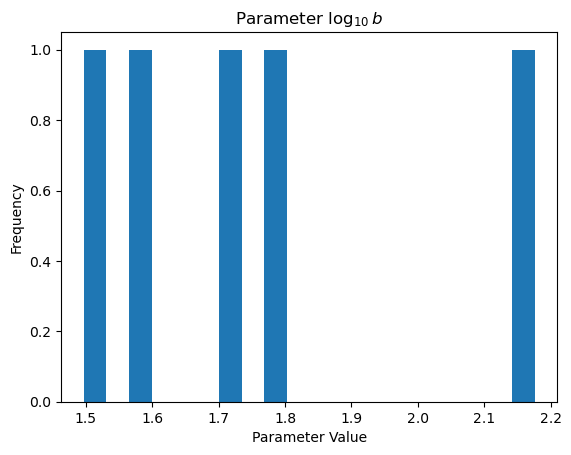

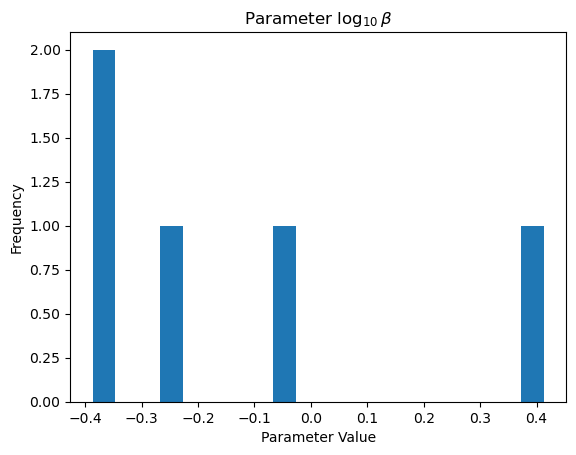

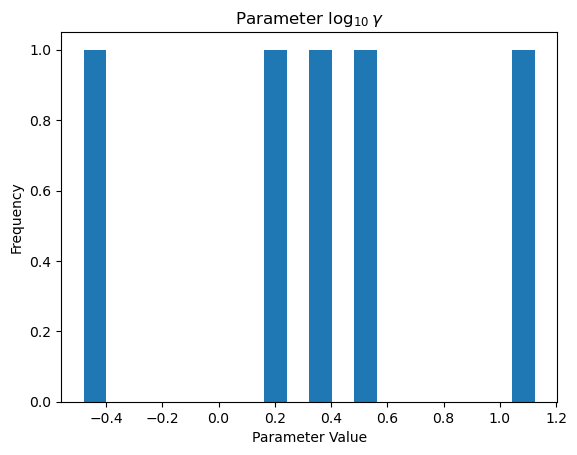

In [82]:
param_names = [i for i in glu_adata.var.keys() if 'param' in i]
for name in param_names:
    plt.hist(glu_adata.var[name], bins=20)
    plt.title('Parameter ' + name[6:])
    plt.xlabel('Parameter Value')
    plt.ylabel('Frequency')
    # plt.savefig(search_result.inference_string + '/parameter_dist_'+ str(i))#'/parameter_dist_{}'.format(
    plt.show()

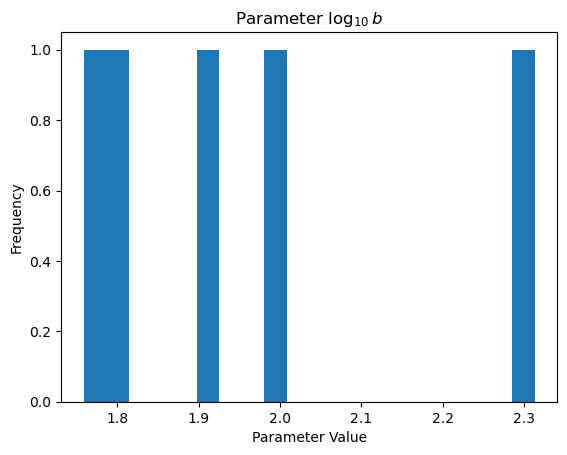

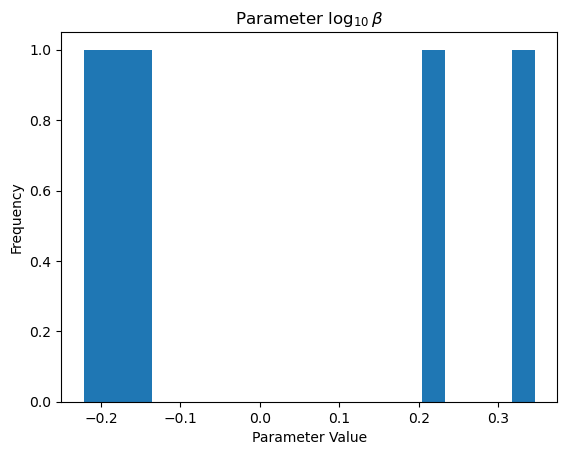

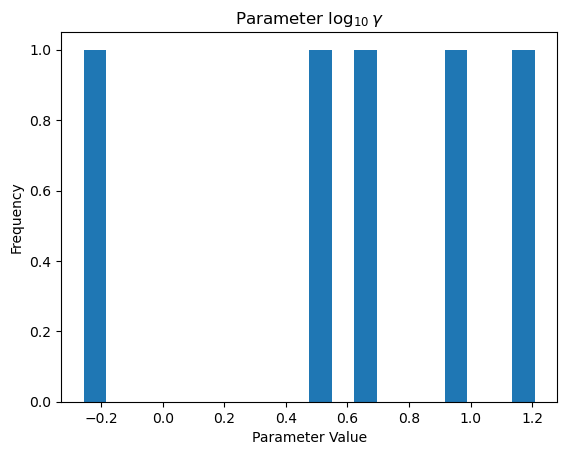

In [83]:
param_names = [i for i in gaba_adata.var.keys() if 'param' in i]
for name in param_names:
    plt.hist(gaba_adata.var[name], bins=20)
    plt.title('Parameter ' + name[6:])
    plt.xlabel('Parameter Value')
    plt.ylabel('Frequency')
    # plt.savefig(search_result.inference_string + '/parameter_dist_'+ str(i))#'/parameter_dist_{}'.format(
    plt.show()

## Plot parameter values against gene length.

INFO:root:No rejection statistics have been computed.
INFO:root:Figure stored to gaba_example/Bursty_Poisson_1x1/analysis_figures/length_dependence.png.


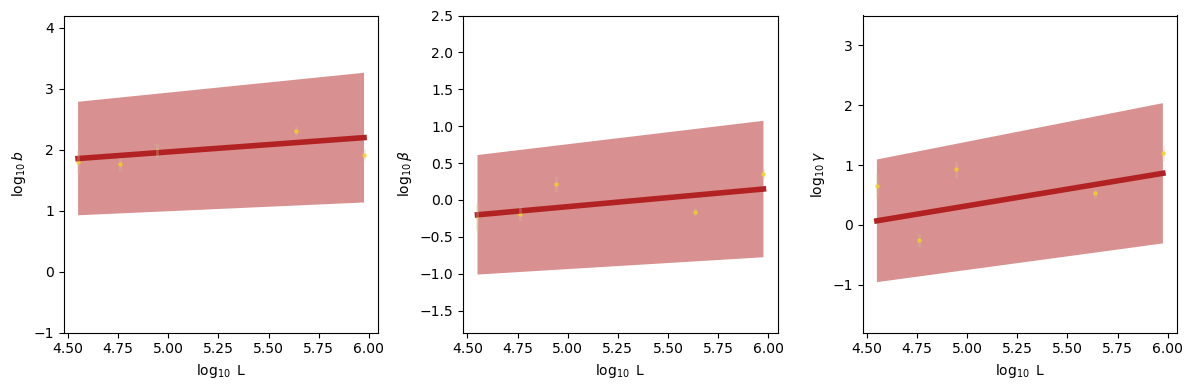

In [84]:
sampling_optimum = gaba_adata.uns['search_result'].samp_optimum
gaba_adata.uns['search_result'].plot_param_L_dep(plot_fit=True, plot_errorbars=True)

# Analysis (to be implemented)

## Reject genes.

In [85]:
# # Add rejection filter to adata.
gaba_adata = inference.reject_genes(gaba_adata, reject_at_bounds=False)#, threshold=-1, use_hellinger=False, reject_at_bounds=False)
glu_adata = inference.reject_genes(glu_adata, reject_at_bounds=False)#, threshold=-1, use_hellinger=False, reject_at_bounds=False)

# Show rejected genes.
display(glu_adata.var[['rejected_genes', 'csq', 'pval', 'hellinger']])
display(gaba_adata.var[['rejected_genes', 'csq', 'pval', 'hellinger']])

# # Save chi-square values.
chi_squareds_glu,  chi_squareds_gaba = glu_adata.var['csq'], gaba_adata.var['csq']

INFO:root:P-value threshold: 0.05, Adjusted P-value threshold:0.05, Hellinger Threshold:0.05
INFO:root:Chi-square computation complete. Rejected 2 genes out of 5. Runtime: 0.0 seconds.
INFO:root:P-value threshold: 0.05, Adjusted P-value threshold:0.05, Hellinger Threshold:0.05
INFO:root:Chi-square computation complete. Rejected 1 genes out of 5. Runtime: 0.0 seconds.


,rejected_genes,csq,pval,hellinger
gene_name,,,,
Eif5b,False,147.938515,1.534659e-05,0.008651
Xrcc5,False,142.122741,8.768604e-23,0.006128
Klhl12,False,174.529526,1.158261e-27,0.006821
Rgs7,True,1039.974859,1.189539e-61,0.056915
Thsd7b,False,484.975454,8.658373e-64,0.018474


,rejected_genes,csq,pval,hellinger
gene_name,,,,
Eif5b,False,64.981475,5.019640e-04,0.035304
Xrcc5,False,25.160229,1.408159e-02,0.025363
Klhl12,False,28.627287,1.431363e-03,0.019003
Rgs7,True,250.794125,6.745188e-22,0.224925
Thsd7b,True,66.604483,1.681456e-07,0.080078


## Execute differential expression analysis.

/home/cat/.conda/envs/myenv/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


[]
[]
[]


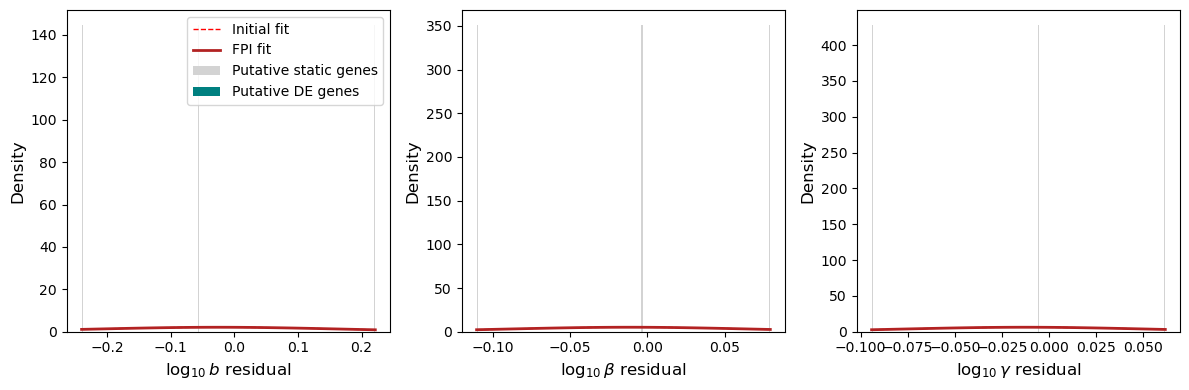

In [86]:
DE_genes, DE_filter, offs, residuals = analysis.DE_parameters(glu_adata, gaba_adata, viz=True, use_sigma=True)#, pval_thr=0.1)

for i in (DE_genes):
    print([j for j in i.index])

# FCs, p_values = analysis.DE(adata)

In [87]:
# # NB changing loom to h5ad.
# adata_gaba = anndata.read_loom('monod_examples/sample_data/allen_C01_gaba.loom')
# adata_gaba.var_names = adata_gaba.var['gene_name']
# adata_gaba.obs_names = adata_gaba.obs['barcode']
# adata_gaba.obs = adata_gaba.obs.drop(columns=['barcode'])
# adata_gaba.var = adata_gaba.var.drop(columns=['gene_name'])
# adata_gaba.write('gaba_example.h5ad')

### Show some gene distributions.

[0 1 2]
Eif5b
Xrcc5
Klhl12


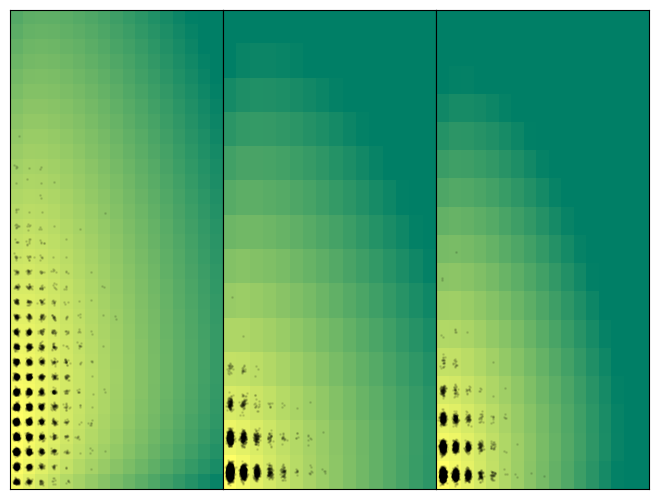

In [88]:
fitted_adata = glu_adata

search_result, search_data = fitted_adata.uns['search_result'], fitted_adata.uns['search_data']
logscale = True

sz =(1,3)
(nrows, ncols) = sz
fig1, ax1 = plt.subplots(nrows=nrows, ncols=ncols)

nax = np.prod(sz)

genes_to_plot = np.arange(nax)

genes_to_plot = np.asarray(genes_to_plot)
if genes_to_plot.dtype == bool:
    gtp_temp = np.arange(self.n_genes)
    genes_to_plot = gtp_temp[genes_to_plot]

number_of_genes_to_plot = len(genes_to_plot)
if number_of_genes_to_plot > 5:
    number_of_genes_to_plot = 5
    genes_to_plot = genes_to_plot[: 5]
if number_of_genes_to_plot > nax:  # This should no longer break...
    number_of_genes_to_plot = nax
    genes_to_plot = genes_to_plot[:nax]

j_ = 0
marg = 'joint'
modalities = ['spliced', 'unspliced']

print(genes_to_plot)
for i_ in genes_to_plot:
    lm = np.copy(search_data.M[:, i_])
    
    # TODO: generalize by adding attribute names as attribute of e.g. CMEModel
    # attributes = ['unspliced', 'spliced', 'protein']
    
    num_modalities = 2
    for i in range(num_modalities):
        if marg == modalities[i]:
            lm[:i] = 1
            lm[i+1:]=1
            
    axloc = np.unravel_index(j_, sz) if (sz[0] > 1 and sz[1] > 1) else j_

    samp = search_result.regressor_optimum[i_]
    Pa = np.squeeze(search_result.model.eval_model_pss(search_result.phys_optimum[i_], lm, samp))
    layers = np.array([i.copy() for i in search_data.layers])
    
    marg = 'joint'
    if marg == "joint":
        if logscale:
            Pa[Pa < 1e-10] = 1e-10
            Pa = np.log10(Pa)

        if num_modalities==2:
            ax1[axloc].imshow(Pa.T, aspect="auto", cmap="summer")
        elif num_modalities==3:
            ax1[axloc].imshow(Pa.sum(axis=2).T, aspect="auto", cmap="summer")
        else:
            log.error('Joint distribution plot only implemented for 2 or 3 modalities')
            
        ax1[axloc].invert_yaxis()

        jitter_magn = 0.1
        jitter = np.random.randn(2, search_result.n_cells) * jitter_magn
        ax1[axloc].scatter(
            *layers[:2, :,i_] + jitter, c="k", s=1, alpha=0.1
        )

        ax1[axloc].set_xlim([-0.5, search_data.M[0, i_] - 1.5])
        ax1[axloc].set_ylim([-0.5, search_data.M[1, i_] - 1.5])
    else:
        plot_hist_and_fit(ax1[axloc], search_data, i_, Pa, marg)
        if logscale:
            ax1[axloc].set_yscale("log")

    print(search_result.gene_names.index[i_])
    # if title:
    #     titlestr = search_result.gene_names[i_]
    #     if hasattr(search_result, "rejected_genes") and search_result.rejected_genes[i_]:
    #         titlestr += " (rej.)"
    #     ax1[axloc].set_title(titlestr, fontdict={"fontsize": 9})
    ax1[axloc].set_xticks([])
    ax1[axloc].set_yticks([])
    j_ += 1
fig1.tight_layout(pad=0.02)
